In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [61]:
df = pd.read_csv("data/train_values.csv")

In [62]:
df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [63]:
df.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [64]:
labels = pd.read_csv("data/train_labels.csv")

In [65]:
labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [66]:
df = df.sort_values("building_id")
labels = labels.sort_values("building_id")

In [67]:
df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
47748,4,30,266,1224,1,25,5,2,t,r,...,0,0,0,0,0,0,0,0,0,0
212102,8,17,409,12182,2,0,13,7,t,r,...,0,0,0,0,0,0,0,0,0,0
60133,12,17,716,7056,2,5,12,6,o,r,...,0,0,0,0,0,0,0,0,0,0
34181,16,4,651,105,2,80,5,4,n,r,...,0,0,0,0,0,0,0,0,0,0
25045,17,3,1387,3909,5,40,5,10,t,r,...,0,0,0,0,0,0,0,0,0,0


In [68]:
labels.head()

,building_id,damage_grade
47748,4,2
212102,8,3
60133,12,3
34181,16,2
25045,17,2


In [69]:
df["damage_grade"] = labels["damage_grade"]

In [70]:
df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
47748,4,30,266,1224,1,25,5,2,t,r,...,0,0,0,0,0,0,0,0,0,2
212102,8,17,409,12182,2,0,13,7,t,r,...,0,0,0,0,0,0,0,0,0,3
60133,12,17,716,7056,2,5,12,6,o,r,...,0,0,0,0,0,0,0,0,0,3
34181,16,4,651,105,2,80,5,4,n,r,...,0,0,0,0,0,0,0,0,0,2
25045,17,3,1387,3909,5,40,5,10,t,r,...,0,0,0,0,0,0,0,0,0,2


In [71]:
df.to_csv("data/labeled_train.csv")

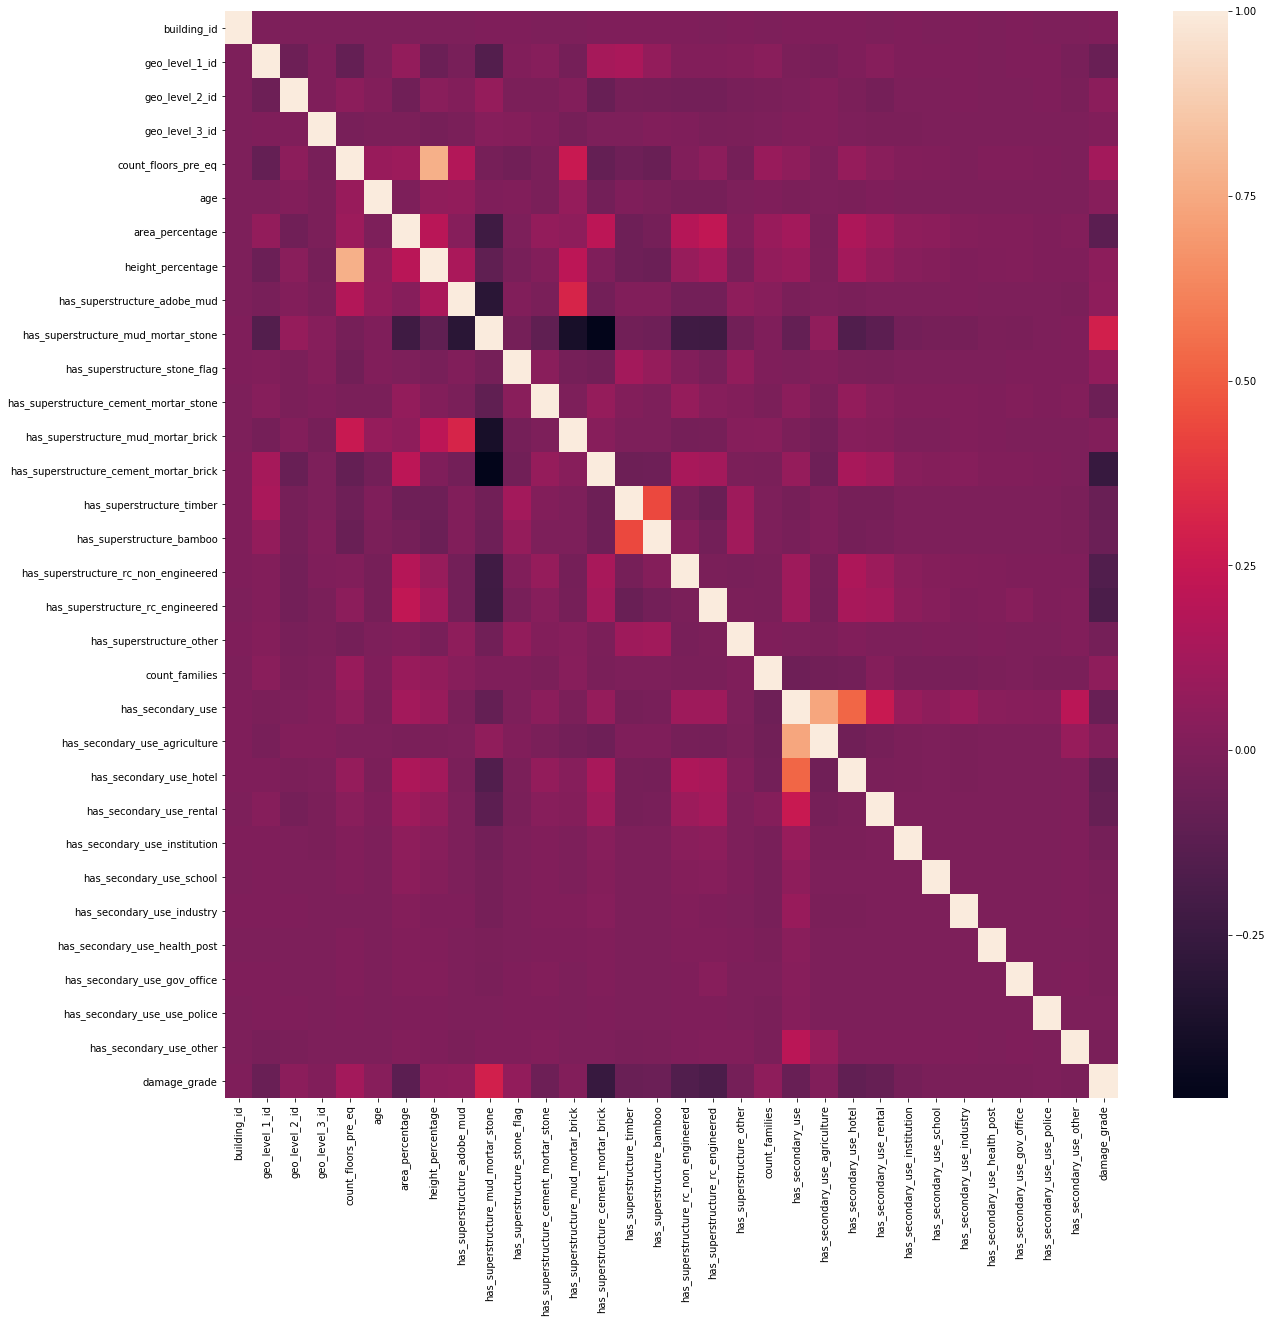

In [72]:
plt.rcParams["figure.figsize"] = (20,20)
sns.heatmap(df.corr())

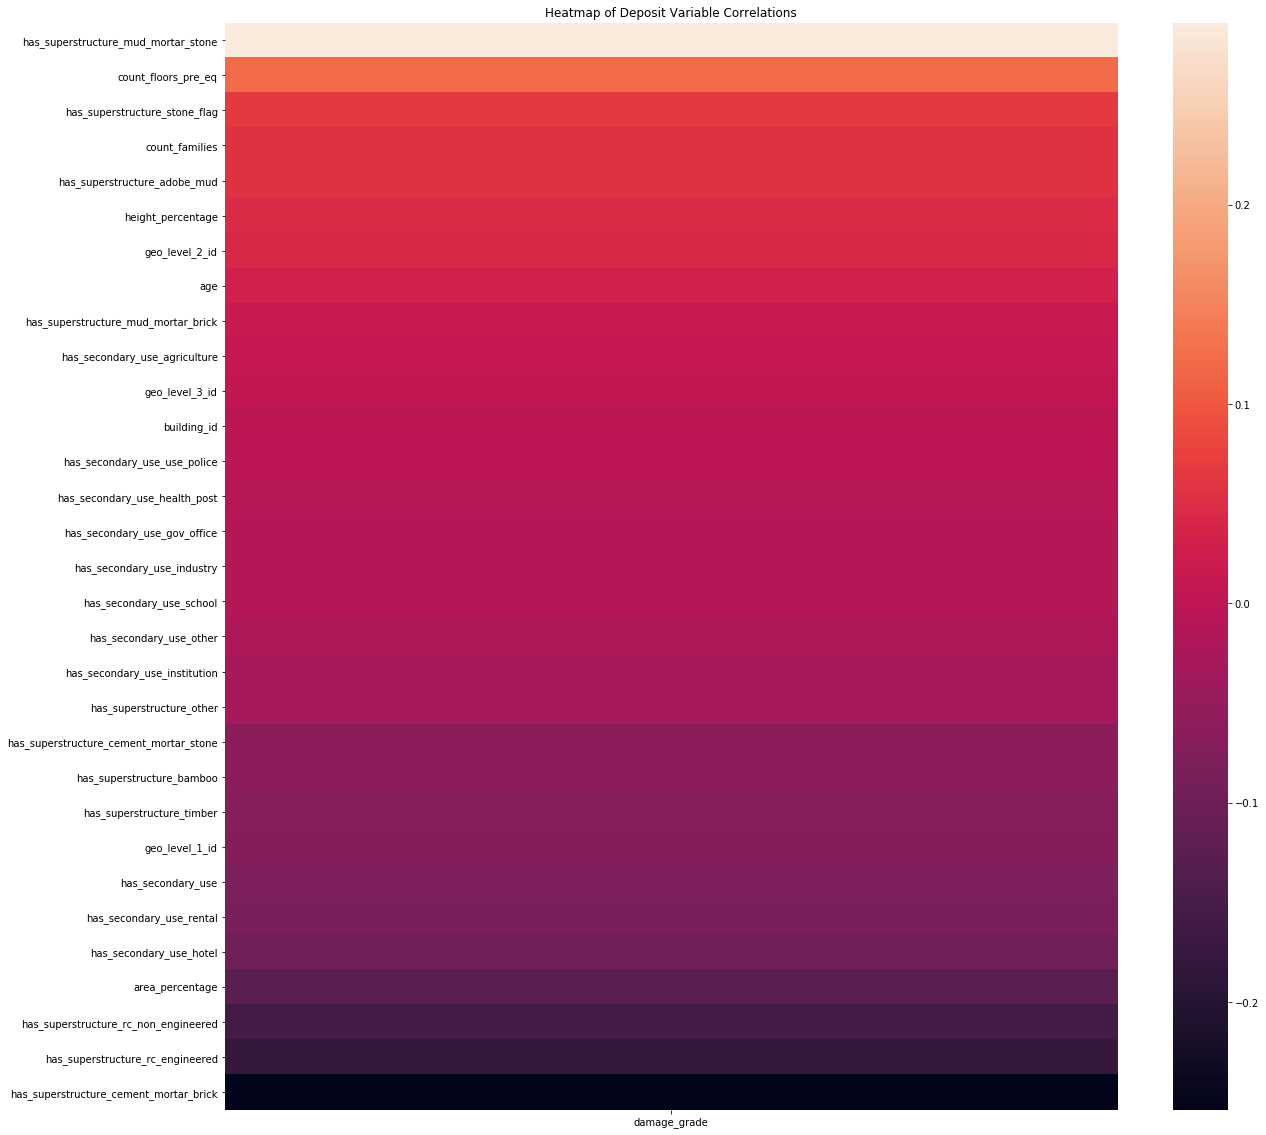

In [73]:
DEPOSIT_COLUMN = 'damage_grade'
correlation_matrix = df.corr()
def plot_deposit_correlations(data):
    '''
    Isolates the deposit columns of the correlation matrix and visualize it.
    '''
    deposit_correlation_column = pd.DataFrame(correlation_matrix[DEPOSIT_COLUMN].drop(DEPOSIT_COLUMN))
    deposit_correlation_column = deposit_correlation_column.sort_values(by=DEPOSIT_COLUMN, ascending=False)
    sns.heatmap(deposit_correlation_column)
    plt.title('Heatmap of Deposit Variable Correlations')
    
plot_deposit_correlations(df)


In [74]:
df = pd.read_csv("data/labeled_train.csv")

In [75]:
pca = PCA(n_components=2)

In [76]:
df.head()

,Unnamed: 0,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,47748,4,30,266,1224,1,25,5,2,t,...,0,0,0,0,0,0,0,0,0,2
1,212102,8,17,409,12182,2,0,13,7,t,...,0,0,0,0,0,0,0,0,0,3
2,60133,12,17,716,7056,2,5,12,6,o,...,0,0,0,0,0,0,0,0,0,3
3,34181,16,4,651,105,2,80,5,4,n,...,0,0,0,0,0,0,0,0,0,2
4,25045,17,3,1387,3909,5,40,5,10,t,...,0,0,0,0,0,0,0,0,0,2


In [77]:
def fuck_naman(df, column_name):
    one_hot = pd.get_dummies(df[column_name])
    df = df.drop(column_name,axis = 1)
    df = df.join(one_hot)
    for letter in one_hot.columns:
        df[column_name + "_" + letter] = df[letter]
        df.drop(letter, axis=1, inplace=True)
    return df
        
    

In [78]:
df = fuck_naman(df, "foundation_type")

In [79]:
df.head()

,Unnamed: 0,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,...,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w
0,47748,4,30,266,1224,1,25,5,2,t,...,0,0,0,0,2,0,0,1,0,0
1,212102,8,17,409,12182,2,0,13,7,t,...,0,0,0,0,3,0,0,1,0,0
2,60133,12,17,716,7056,2,5,12,6,o,...,0,0,0,0,3,0,0,1,0,0
3,34181,16,4,651,105,2,80,5,4,n,...,0,0,0,0,2,0,0,1,0,0
4,25045,17,3,1387,3909,5,40,5,10,t,...,0,0,0,0,2,0,0,1,0,0


In [80]:
categorical_vars = ["land_surface_condition", "roof_type", "ground_floor_type", "other_floor_type", "position", "plan_configuration", "legal_ownership_status"]
for var in categorical_vars:
    df = fuck_naman(df, var)

In [88]:
df.to_csv('data/labeled_train.csv')

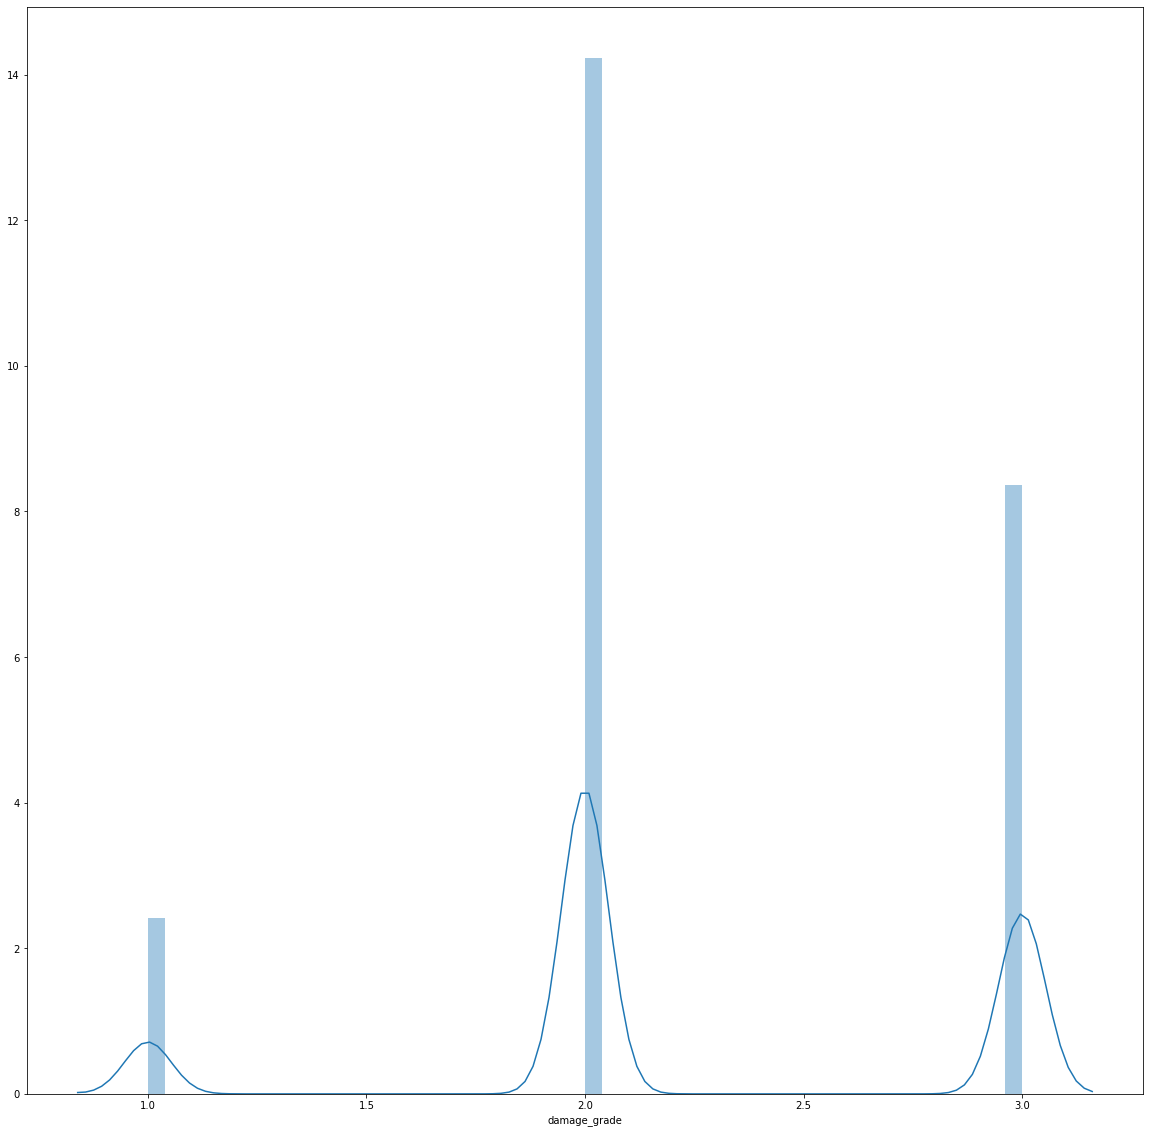

In [82]:
sns.distplot(df["damage_grade"])

In [83]:
normalized_df=(df-df.min())/(df.max()-df.min())

In [92]:
X = df.drop("damage_grade", axis=1)
y = df["damage_grade"]
targets = df["damage_grade"].unique()
pca = PCA()
X_r = pca.fit(X).transform(X)
PCA_Df = pd.DataFrame(data = X_r
             , columns = ['principal component 1', 'principal component 2'])
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = df['damage_grade'] == target
    plt.scatter(PCA_Df.loc[indicesToKeep, 'principal component 1']
               , PCA_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')


ValueError: Shape of passed values is (260601, 70), indices imply (260601, 2)

/home/jordanrodrigues/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


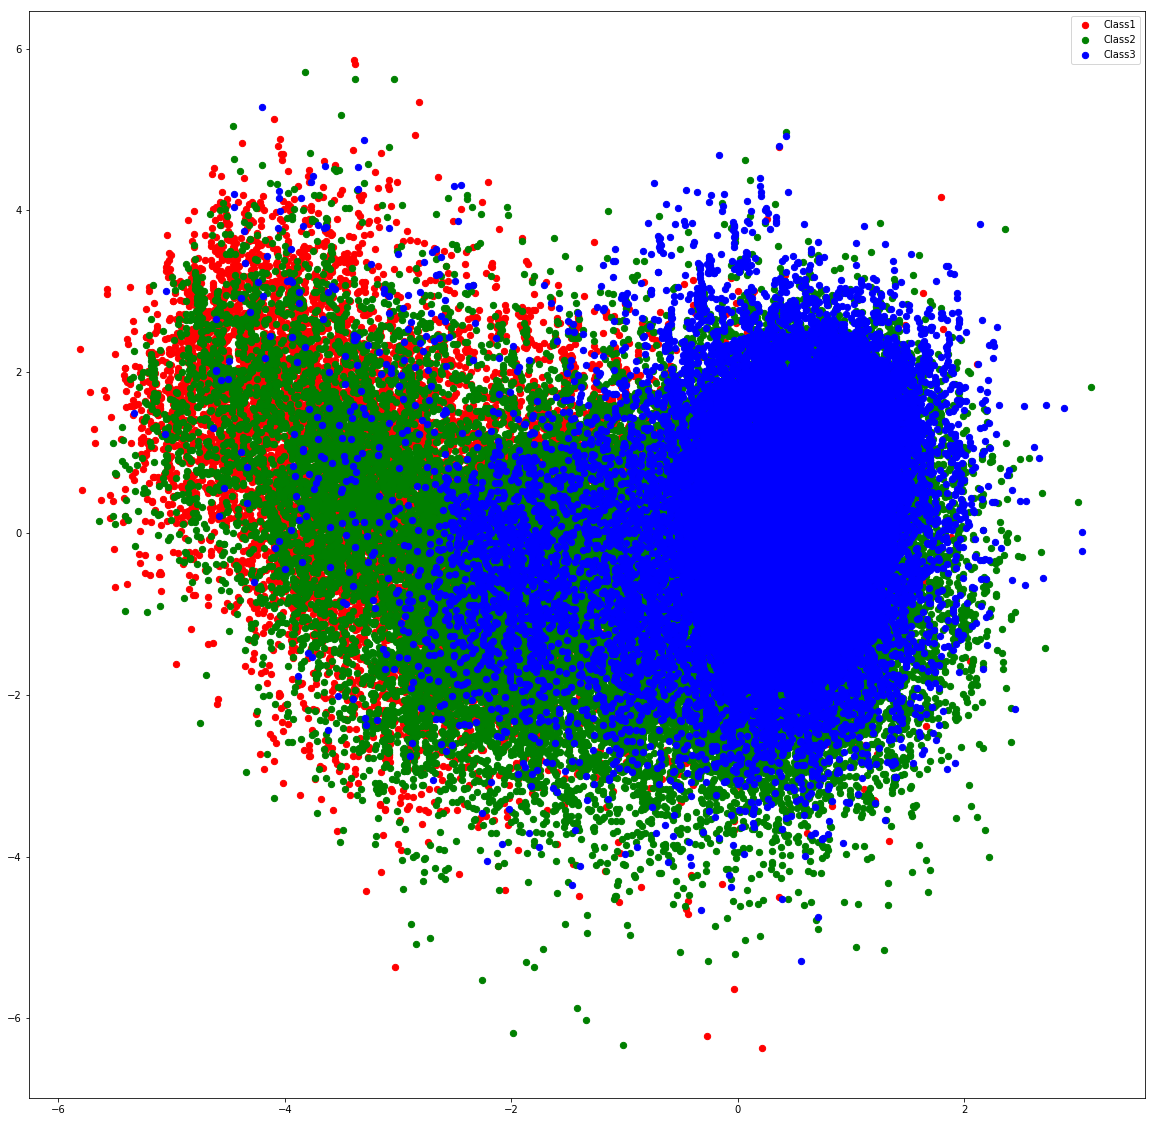

In [122]:
lda = LDA()
dmg_lda = lda.fit_transform(X, y)
l_x = dmg_lda[:,0]
l_y = dmg_lda[:,1]
cdict={1:'red',2:'green',3:'blue'}
labl={1:'Class1',2:'Class2',3:'Class3'}
for l in np.unique(df["damage_grade"]):
    ix=np.where(y==l)
    plt.scatter(l_x[ix],l_y[ix],c=cdict[l],s=40,
           label=labl[l])
    #plt.set_title("LDA Analysis")
    plt.legend()